# Working with USGS data

Raw data:

http://earthquake.usgs.gov/data/centennial/centennial_Y2K.CAT

README:  http://earthquake.usgs.gov/data/centennial/centennial_README.rtf

Stable Continental Regions:

http://earthquake.usgs.gov/data/scr_catalog.txt

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas
from karmapi import base, maps, show

from karmapi import usgs

from matplotlib import pyplot

### go to where the karma is

In [3]:
cd ~/karmapi

/home/jng/karmapi


In [4]:
# if you don't already have the data this downloads and saves it -- uncomment to get the data

# df = usgs.get()
# base.save('data/quake/centennial', df)

In [5]:
pandas.set_option('display.notebook', False)
pandas.set_eng_float_format(1, True)

In [6]:
df = base.load('data/quake/centennial')

In [7]:
df.index = pandas.to_datetime(df.apply(usgs.timestamp, axis=1))

In [64]:
#pandas.set_eng_float_format(3, False)
min_severity = 7.2
df['flag'] = 1

# sum this month with six months from now
df['six'] = (df.flag[:-6] + df.flag[6:]).fillna(df.flag)

df = df[df.severity >= min_severity]
df = df.resample('M', how='sum').fillna(0)

In [65]:
df.head()

            year  month   day  hour  minute  second   lat   lon    foo    bar  \
1900-01-31  3.8k    2.0  51.0  25.0    55.0     0.0  68.0  41.0  450.0  718.0   
1900-02-28   0.0    0.0   0.0   0.0     0.0     0.0   0.0   0.0    0.0    0.0   
1900-03-31   0.0    0.0   0.0   0.0     0.0     0.0   0.0   0.0    0.0    0.0   
1900-04-30   0.0    0.0   0.0   0.0     0.0     0.0   0.0   0.0    0.0    0.0   
1900-05-31   0.0    0.0   0.0   0.0     0.0     0.0   0.0   0.0    0.0    0.0   

            foobar  severity  flag   dim  value  six  dimsix  
1900-01-31     0.0      14.8   1.0  31.0  32.3m  1.0    31.0  
1900-02-28     0.0       0.0   0.0   0.0    0.0  0.0     0.0  
1900-03-31     0.0       0.0   0.0   0.0    0.0  0.0     0.0  
1900-04-30     0.0       0.0   0.0   0.0    0.0  0.0     0.0  
1900-05-31     0.0       0.0   0.0   0.0    0.0  0.0     0.0  

In [66]:
df['dim'] = df.index.days_in_month
df['dimsix'] = (df.dim[:-6] + df.dim[6:]).fillna(df.dim) 

In [67]:
df.head()

            year  month   day  hour  minute  second   lat   lon    foo    bar  \
1900-01-31  3.8k    2.0  51.0  25.0    55.0     0.0  68.0  41.0  450.0  718.0   
1900-02-28   0.0    0.0   0.0   0.0     0.0     0.0   0.0   0.0    0.0    0.0   
1900-03-31   0.0    0.0   0.0   0.0     0.0     0.0   0.0   0.0    0.0    0.0   
1900-04-30   0.0    0.0   0.0   0.0     0.0     0.0   0.0   0.0    0.0    0.0   
1900-05-31   0.0    0.0   0.0   0.0     0.0     0.0   0.0   0.0    0.0    0.0   

            foobar  severity  flag  dim  value  six  dimsix  
1900-01-31     0.0      14.8   1.0   31  32.3m  1.0    31.0  
1900-02-28     0.0       0.0   0.0   28    0.0  0.0    28.0  
1900-03-31     0.0       0.0   0.0   31    0.0  0.0    31.0  
1900-04-30     0.0       0.0   0.0   30    0.0  0.0    30.0  
1900-05-31     0.0       0.0   0.0   31    0.0  0.0    31.0  

In [68]:
df.tail()

             year  month   day  hour  minute  second   lat    lon    foo  bar  \
2007-05-31    0.0    0.0   0.0   0.0     0.0     0.0   0.0    0.0    0.0  0.0   
2007-06-30    0.0    0.0   0.0   0.0     0.0     0.0   0.0    0.0    0.0  0.0   
2007-07-31    0.0    0.0   0.0   0.0     0.0     0.0   0.0    0.0    0.0  0.0   
2007-08-31   6.0k   24.0  24.0  57.0    52.0   166.9 -34.9  198.8  449.0  0.0   
2007-09-30  10.0k   45.0  84.0  53.0   125.0   142.5 -46.0  674.8  393.8  0.0   

            foobar  severity  flag  dim  value  six  dimsix  
2007-05-31     0.0       0.0   0.0   31    0.0  0.0    31.0  
2007-06-30     0.0       0.0   0.0   30    0.0  0.0    30.0  
2007-07-31     0.0       0.0   0.0   31    0.0  0.0    31.0  
2007-08-31    1.3k      22.7   1.0   31  32.3m  1.0    31.0  
2007-09-30    1.8k      38.5   1.0   30  33.3m  1.0    30.0  

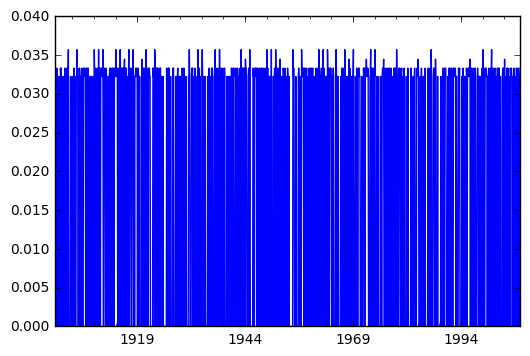

In [69]:
df.value.plot()

In [71]:
df.describe()

        year  month   day  hour  minute  second    lat    lon    foo    bar  \
count   1.3k   1.3k  1.3k  1.3k    1.3k    1.3k   1.3k   1.3k   1.3k   1.3k   
mean    1.4k    4.8  11.1   8.3    20.4    19.9    6.1   36.2   59.2  144.5   
std     1.8k    7.7  16.1  12.0    30.2    30.4   27.9  118.3  140.6  226.2   
min      0.0    0.0   0.0   0.0     0.0     0.0 -115.5 -521.5    0.0    0.0   
25%      0.0    0.0   0.0   0.0     0.0     0.0    0.0    0.0    0.0    0.0   
50%      0.0    0.0   0.0   0.0     0.0     0.0    0.0    0.0    0.0    0.0   
75%     2.0k    8.0  21.0  16.0    37.0    36.0    7.9  102.3   42.7  224.0   
max    11.8k   72.0  94.0  86.0   218.0   221.3  222.0  674.8   1.3k   1.4k   

       foobar  severity    flag     dim  value     six  dimsix  
count    1.3k      1.3k    1.3k    1.3k   1.3k    1.3k    1.3k  
mean    131.7       5.3  478.0m    30.4  15.7m  952.0m    60.6  
std     301.3       6.9  499.7m  816.8m  16.4m  997.3m     3.4  
min       0.0       0.0     

In [78]:
value = df.value

In [79]:
len(df), len(value)

(1293, 1293)

In [80]:
so = base.sono(value.values, 12 * 48)

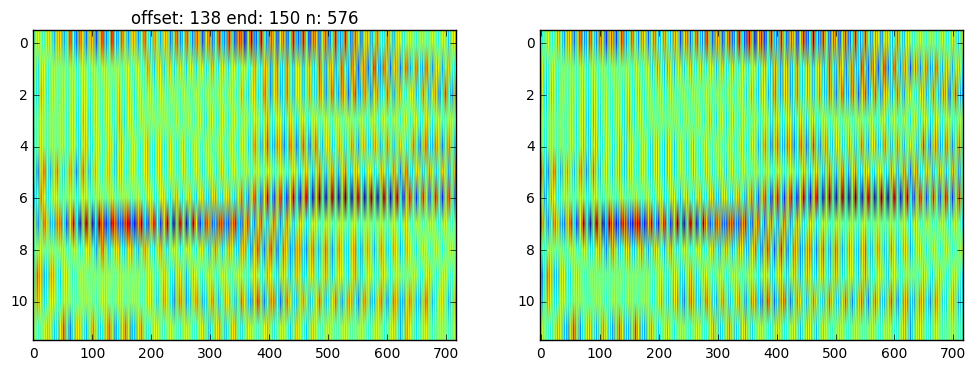

In [81]:
offset = 138

end = offset + 12
show.sono2(so, offset=offset, end=end, cmap=None)

In [82]:
def isprime(n):
    
    for k in range(2, 1 + int(n ** 0.5)):
        #print(k, n/k)
        if (n // k) == (n/k):
            #print(n, k)
            return False
    return True

In [90]:
# look at first k fourier compoments
k = 96

p = set([1+x for x in range(k) if isprime(1+x)])

len(p)

25

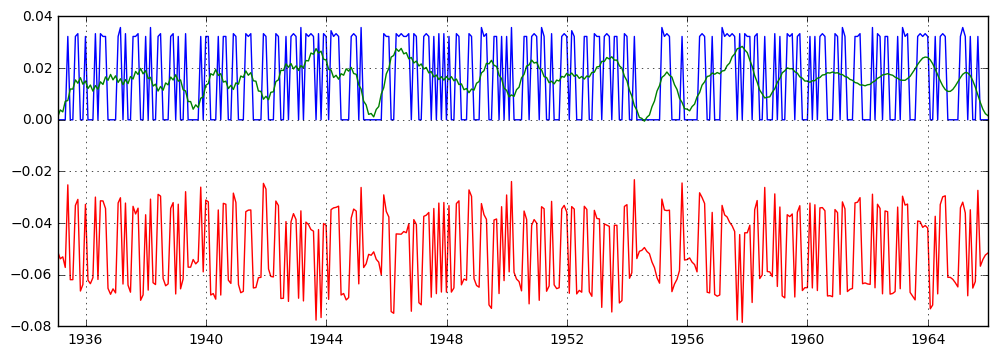

In [91]:
k = 96
vfft = base.fft.fft(value.values)

points = p

points = set(range(1, k))

for x in range(1, int(len(vfft)/2)):
    if x not in points:
        vfft[x] = 0
        vfft[-x] = 0

iso = base.fft.ifft(vfft)

xdf = value.copy().to_frame()
xdf['kvalue'] = iso.real
xdf['delta'] = xdf.value - (xdf.kvalue +.05)

show.wide()
pyplot.grid(True)
pyplot.plot(xdf['1935':'1965'])

In [92]:
a = xdf.value.std()
b = xdf.delta.std()

(a-b)/a

0.080330075507916904

In [88]:
xdf.describe()

       value  kvalue  delta
count   1.3k    1.3k   1.3k
mean   15.7m   15.7m -50.0m
std    16.4m    3.2m  16.1m
min      0.0    8.3m -74.1m
25%      0.0   13.3m -65.2m
50%      0.0   15.5m -60.1m
75%    32.3m   17.9m -33.7m
max    35.7m   26.0m -25.1m

In [26]:
sfft = base.fft.fft(value.values)

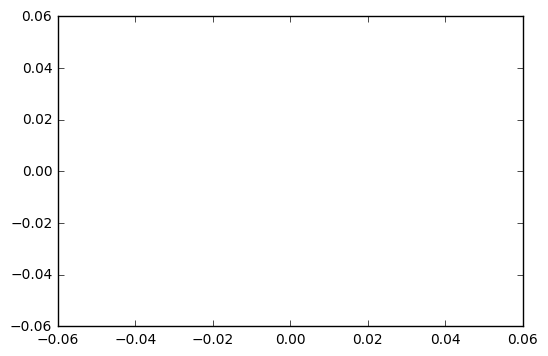

In [27]:
pyplot.plot(sfft.real[1:600])

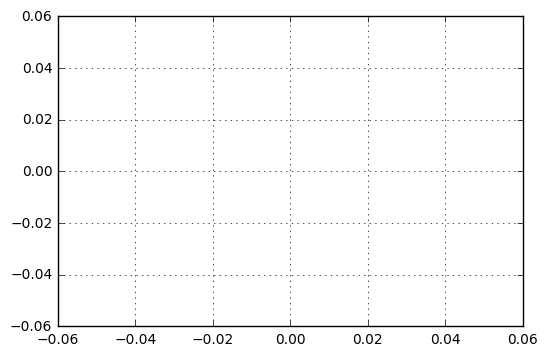

In [28]:
k = 119
a = [x[k] for x in so]

afft = base.fft.fft(a)

pyplot.plot(afft.imag[:3*15])
pyplot.grid(True)